> **Student Names and IDs**:
>
> - Newton Kwan, nk150
> - Joyce Choi, jc515
> - Ashka Stephen, aas74

# Homework 8

## Part 1: Classifying Digit Images

In [84]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
NData = len(digits.images)
data = {'x': digits.images.reshape((NData, -1)), 'y': digits.target}

testFraction = 0.6
T, S = {}, {}
T['x'], S['x'], T['y'], S['y'] = train_test_split(data['x'], data['y'],
 test_size=testFraction, random_state=0)

NT, NS = len(T['y']), len(S['y'])

def evaluate(h, T, S, name):
    def errorRate(h, S):
        x, y = S['x'], S['y']
        return (1 - h.score(x, y)) * 100
    
    f = '{:s}: training error rate is {:.2f}, test error rate is {:.2f}'
    err = (errorRate(h, T), errorRate(h, S), name)
    print(f.format(name, err[0], err[1]))
    return err


### Problem 1.1

Assuming that all digits appear with equal frequency in the data, what is the expected error rate (in percent) of a classifier that ignores the input and guesses the output uniformly and at random? Justify your answer with a very brief sentence.

### Answer

Expected error rate of a classifier that ignores input and guesses uniformly at random is: 

$$\text{error}= 1 - (1/K)$$

where K is the number of classes. Each number is guessed from a uniform probability distribution or 1/K number of times for sufficiently large number of guesses. In this specific example, the error rate is 90%. 

### Problem 1.2

Train a `sklearn.tree.DecisionTreeClassifier`. Show your code and report training and test error rates.

### Answer

In [85]:
from sklearn.tree import DecisionTreeClassifier
def information(classifier, T, S, random_state):
    '''
    Desribes the result of evaluating the classifier on the sets 
    '''
    
    clf = classifier(random_state=random_state).fit(T['x'], T['y'])
    train_risk = clf.score(T['x'], T['y'])
    test_risk = clf.score(S['x'], S['y'])
    print("The training error rate is {:.2f}".format(100 - train_risk*100), "%")
    print("The test error rate is {:.2f}".format(100 - test_risk*100), "%")
    
    return train_risk, test_risk


In [86]:
d_trees = information(DecisionTreeClassifier, T, S, random_state = 0)

The training error rate is 0.00 %
The test error rate is 20.11 %


### Problem 1.3

Use `GridSearchCV` to find a good number of trees for a `sklearn.ensemble.RandomForestClassifier` by 10-fold cross-validation. Show your code and report (i) the number of trees in the forest you end up choosing, (ii) the training and test error rates, and (iii) the out-of-bag error rate estimate.

### Answer

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
K = 10  # K-fold cross-validation 
# create dictionary of hyper parameters 
param_grid = {} 
param_grid['random_state'] = [0]
param_grid['n_estimators'] = range(100, 500, 100)

#print(param_grid) # print out parameters as sanity check

In [109]:
# Perform cross validation for K = 10 
rforest_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', cv = K)
rforest_clf.fit(T['x'], T['y'])
hyp_params = rforest_clf.cv_results_['params']           # list of dictionaries of hyper parameters
test_scores = rforest_clf.cv_results_['mean_test_score'] # list of test scores (whose index corresponds to hyp_params) 
best_params = rforest_clf.best_params_                   # gives the best paramters found by GridSearchCV

In [110]:
# Retrain on T with best hyper parameters 
best_n_estimators = best_params['n_estimators'] # best hyper paramter n_estimators from clf
new_rforest_clf = RandomForestClassifier(n_estimators = best_n_estimators, random_state=0, oob_score = True).fit(T['x'], T['y'])
new_rforest_train_risk = new_rforest_clf.score(T['x'], T['y']) # training accuracy 
new_rforest_test_risk = new_rforest_clf.score(S['x'], S['y']) # test accuracy 
print("The number of trees in the forest:", best_n_estimators)
print("The training error rate is is {:.2f}".format(100 - new_rforest_train_risk*100), "%")
print("The test error rate is {:.2f}".format(100 - new_rforest_test_risk*100), "%")
print("The out-of-bag error rate is {:.2f}".format(100 - new_rforest_clf.oob_score_*100), "%")

The number of trees in the forest: 100
The training error rate is is 0.00 %
The test error rate is 3.61 %
The out-of-bag error rate is 5.29 %


### Problem 1.4

Train a `sklearn.linear_model.LogisticRegression` classifier. Show your code and report training and test error rates.

### Answer

In [91]:
from sklearn.linear_model import LogisticRegression
def information(classifier, T, S, C, solver, multi_class, random_state):
    '''
    Desribes the result of evaluating the classifier on the sets 
    '''
    
    clf = classifier(C=C, solver=solver, multi_class=multi_class, random_state=random_state).fit(T['x'], T['y'])
    train_risk = clf.score(T['x'], T['y'])
    test_risk = clf.score(S['x'], S['y'])
    print("The training error rate is {:.2f}".format(100 - train_risk*100), "%")
    print("The test error rate is {:.2f}".format(100 - test_risk*100), "%")
    
    return train_risk, test_risk

In [92]:
log_reg = information(LogisticRegression, T, S, 1e5, 'lbfgs', 'multinomial', random_state = 0)

The training error rate is 0.00 %
The test error rate is 4.45 %


### Problem 1.5

Use `GridSearchCV` to find a good number of neighbors for a `sklearn.neighbors.KNeighborsClassifier` by 10-fold cross-validation. Show your code and report (i) the number of neighbors you end up choosing, and (ii) the training and test error rates.

#### Programming Note

Neighbors are in the single digits. No point in trying dozens of neighbors.

### Answer

In [111]:
from sklearn.neighbors import KNeighborsClassifier
K = 10  # K-fold cross-validation 
# create dictionary of hyper parameters 
param_grid = {} 
param_grid['n_neighbors'] = range(1, 10, 1)

#print(param_grid) # print out parameters as sanity check

In [112]:
# Perform cross validation for K = 10 
knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv = K)
knn_clf.fit(T['x'], T['y'])
hyp_params = knn_clf.cv_results_['params']           # list of dictionaries of hyper parameters
test_scores = knn_clf.cv_results_['mean_test_score'] # list of test scores (whose index corresponds to hyp_params) 
best_params = knn_clf.best_params_                   # gives the best paramters found by GridSearchCV

In [113]:
# Retrain on T with best hyper parameters 
best_n_neighbors = best_params['n_neighbors'] # best hyper paramter n_estimators from knn_clf
new_knn_clf = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(T['x'], T['y'])
new_knn_train_risk = new_knn_clf.score(T['x'], T['y']) # training accuracy 
new_knn_test_risk = new_knn_clf.score(S['x'], S['y']) # test accuracy 
print("The number of neighbors:", best_n_neighbors)
print("The training error rate is is {:.2f}".format(100 - new_knn_train_risk*100), "%")
print("The test error rate is {:.2f}".format(100 - new_knn_test_risk*100), "%")

The number of neighbors: 1
The training error rate is is 0.00 %
The test error rate is 1.58 %


### Problem 1.6

Let us define the _overfit rate_ of a classifier as the difference between testing error and training error, both expressed as percentages. Write code that prints out the overfit rates for the tree, forest, linear classifier, and k-NN classifier, in this order, one per line. Your printout should say which is which.

### Answer

In [98]:
print("tree overfit rate: {:.2f}".format((d_trees[0] - d_trees[1])*100), "%")
print("forest overfit rate: {:.2f}".format((new_rforest_train_risk - new_rforest_test_risk)*100), "%")
print("linear classifier overfit rate: {:.2f}".format((log_reg[0] - log_reg[1])*100), "%")
print("k-NN overfit rate: {:.2f}".format((new_knn_train_risk - new_knn_test_risk)*100), "%")

tree overfit rate: 20.11 %
forest overfit rate: 3.61 %
linear classifier overfit rate: 4.45 %
k-NN overfit rate: 1.58 %


Write code that prints out the overfit rates for the tree, forest, linear classifier, and k-NN classifier, 

### Problem 1.7

Discuss briefly the results you obtained, by answering the following questions:
- Which classifier works best on this data set?
- Why doesn't everyone always use the best-performing classifier for a problem like this?
- Do random forests reduce overfitting when compared with decision trees?
- In what ways is a linear classifier more convenient than algorithms that may perform better, when optimal performance is not crucial?
- For all but one of the classifiers used, a zero training error rate is no surprise. Which is the odd-man-out, and why?

### Answer

- The k-NN classifier works the best with test error rate of 1.58%. 
- We don’t always use the best-performing classifier because it depends on the dataset. Sometimes the best performing classifier might not generalize well enough. It could also be because we want to trade-off accuracy for time to have a classifier that’s faster and “good enough”.
- Yes, random forest reduce overfitting when compared with decision trees. We see a reduction in the overfit rate from 20.11% to 3.61% 
- Linear classifiers generalize well to other problems, which might be preferable to having a very specific, complex model. It also could have faster calculations than a more complex classifier.
- We expect 0% for decision trees, k-nearest, and random forests. Therefore we are surprised that logistic regression is able to achieve 0% error because that means the decision region is convex (aka the data is linearly separable). This does not happen too often (dataset dependent), especially as we get into higher dimensions.

## Part 2: Closed Convex Polyhedral Cones

### Problem 2.1

Write a function with header
    `def parametric(a):`
that takes a list `a` with the vectors of an implicit representation of a CCP cone on the plane and returns a list with the generators of the parametric representation.

Show your code in a new code cell under the _Answer_ header below. The tests after that will draw your results if your code has no bugs. Of course, you need to make sure that the drawings make sense.

### Answer

In [99]:
import numpy as np
import math

def parametric(l):
    # edge 1: check if superimposed or only one vector 
    if (len(l)==1) or (checkNormal(l)):
        for eachPoint in l:
            generated = generatePoints(eachPoint[0],eachPoint[1])
        generated.append(l[0])
        # print(" - final result: ", removeDuplicates(generated))
        return (removeDuplicates(generated))
 
    #edge 2: check if pointing opposite
    opposite = list([-l[0][0], -l[0][1]])
    if (checkNormal([opposite,l[1]])):
        for eachPoint in l:
            generated = generatePoints(eachPoint[0],eachPoint[1])
        # print(" - final result: ", removeDuplicates(generated))
        return (removeDuplicates(generated))

    saved = []
    for eachPoint in l:
        generated = generatePoints(eachPoint[0],eachPoint[1])
        for eachR in generated:
            if (checkDotProd(eachR,l)):
                saved.append(eachR)
    # print(" - final result: ", removeDuplicates(saved))
    return saved
  

def removeDuplicates(l):
    final_list = [] 
    for point in l: 
        if point not in final_list: 
            final_list.append(point) 
    return final_list 

'''
check if two vectors have the same normal
'''
def checkNormal(l):
    list0 = list(l[0])
    list1 = list(l[1])
    
    len0 = math.sqrt(list0[0]**2 + list0[1]**2)
    len1 = math.sqrt(list1[0]**2 + list1[1]**2)
    
    newList0 = [x / len0 for x in list0]
    newList1 = [x / len1 for x in list1]
    
    return (newList0 == newList1)

'''
  given an x and y - output list of orthogonal
'''
def generatePoints(x,y):
    return [(-y,x),(y,-x)] 
    
'''
output the list of points that satisfy all constraints w dot product check
given an r vector (testR) and a list of all a's to compare (l)
'''
def checkDotProd(testR, l):
    for each in l:
        if np.dot(testR, each) < 0: 
            # should not happen 
            return False
    return True


implicit:{(0, 1), (1, 0)}; parametric: {(1, 0), (0, 1)}
implicit:{(1, 2), (2, 1)}; parametric: {(2, -1), (-1, 2)}
implicit:{(1, 2), (-1, 0)}; parametric: {(-2, 1), (0, 1)}
implicit:{(1, 1), (-1, -1)}; parametric: {(1, -1), (-1, 1)}
implicit:{(0, 1)}; parametric: {(-1, 0), (1, 0), (0, 1)}


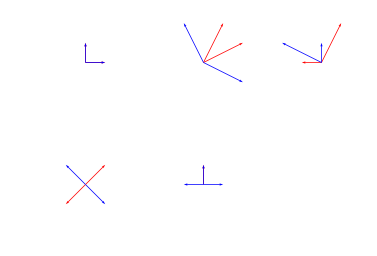

In [100]:
### Tests; Your code should be in a separate code cell above this one

%matplotlib inline

tests = [[(0, 1), (1, 0)],
         [(1, 2), (2, 1)],
         [(1, 2), (-1, 0)],
         [(1, 1), (-1, -1)],
         [(0, 1)]]

def vectorString(a):
    return '{' + ', '.join(['(' + ', '.join([str(b[i]) \
        for i in range(len(b))]) + ')' for b in a]) + '}'

import matplotlib.pyplot as plt
def draw(a, p, k):
    plt.subplot(2, 3, k)
    for b in a:
        plt.quiver(0, 0, b[0], b[1], color='r', units='width', scale=5)    
    for q in p:
        plt.quiver(0, 0, q[0], q[1], color='b', units='width', scale=5)
    plt.axis('equal')
    plt.axis('off')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])

try:
    plt.figure()
    k = 1
    for a in tests:
        p = parametric(a)
        print('implicit:', vectorString(a), '; parametric: ', vectorString(p), sep='')
        draw(a, p, k)
        k += 1
    plt.show()
except NameError:
    pass


### Problem 2.2

Write a function with header
    `def implicit(p):`
that takes a list `p` with the generators of a parametric representation of a CCP cone on the plane and returns a list with the vectors for the implicit representation.

Show your code in a code cell under the _Answer_ header below. The tests after that will draw your results if your code has no bugs. Of course, you need to make sure that the drawings make sense.

### Answer

In [101]:
def implicit(l):
    # edge 1: check if superimposed or only one vector 
    if (len(l)==1) or (checkNormal(l)):
        for eachPoint in l:
            generated = generatePoints(eachPoint[0],eachPoint[1])
        generated.append(l[0])
        # print(" - final result: ", removeDuplicates(generated))
        return (removeDuplicates(generated))
 
    #edge 2: check if pointing opposite
    opposite = list([-l[0][0], -l[0][1]])
    if (checkNormal([opposite,l[1]])):
        for eachPoint in l:
            generated = generatePoints(eachPoint[0],eachPoint[1])
        # print(" - final result: ", removeDuplicates(generated))
        return (removeDuplicates(generated))

    saved = []
    for eachPoint in l:
        generated = generatePoints(eachPoint[0],eachPoint[1])
        for eachR in generated:
            if (checkDotProd(eachR,l)):
                saved.append(eachR)
    # print(" - final result: ", removeDuplicates(saved))
    return saved


parametric: {(0, 1), (1, 0)}; implicit:{(1, 0), (0, 1)}
parametric: {(1, 2), (2, 1)}; implicit:{(2, -1), (-1, 2)}
parametric: {(1, 2), (-1, 0)}; implicit:{(-2, 1), (0, 1)}
parametric: {(1, 1), (-1, -1)}; implicit:{(1, -1), (-1, 1)}
parametric: {(0, 1)}; implicit:{(-1, 0), (1, 0), (0, 1)}


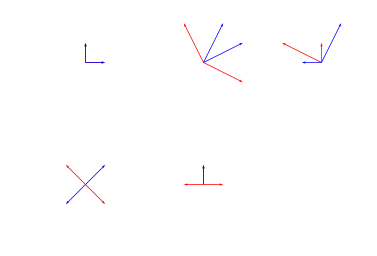

In [102]:
### Tests; Your code should be in a separate code cell above this one

try:
    plt.figure()
    k = 1
    for p in tests:
        a = implicit(p)
        print('parametric: ', vectorString(p), '; implicit:', vectorString(a), sep='')
        draw(a, p, k)
        k += 1
    plt.show()
except NameError:
    pass

### Problem 2.3

Let

$$ P = \{\mathbf{u}\in\mathbb{R}^2\ :\ \mathbf{a}_1^T\mathbf{u} \geq 0 \;\;\text{and}\;\;
\mathbf{a}_2^T\mathbf{u} \geq 0\ \}$$

where

$$ \mathbf{a}_1^T = (0, 1) \;\;\;\text{and}\;\;\; \mathbf{a}_2^T = (-2, 1)\;. $$

What is the _implicit_ (not parametric!) representation of the dual $D$ of $P$?

_Hint:_ The previous problems may help.

### Answer

In [107]:
answer = implicit([(0, 1), (-2, 1)])
print("The implicit representation of the dual D of P is a1 =",answer[0], "and a2 =",answer[1])

The implicit representation of the dual D of P is a1 = (-1, 0) and a2 = (1, 2)


## Part 3: Convex Programs

### Problem 3.1

Use the definition of function convexity to prove that the function

$$ f(u, v) = u + v $$

is (weakly) convex in the vector $\mathbf{u} = (u, v)$.

### Answer

$f$ is convex is for every $\mathbf{u}, \mathbf{v} \in R^m$ and $t \in [0,1]$ the following inequality holds 

$$ f(t\mathbf{u} + (1-t)\mathbf{v}) \leq tf(\mathbf{u}) + (1-t)f(\mathbf{v})$$

Let $\mathbf{u} = (u, v)$ and $\mathbf{v} = (u_2, v_2)$. Showing that the left side of the inequality is equivalent to the right side of the inequality will be sufficient proof that $f$ is weakly convex.

Starting with the left side of the inequality, 

$$f(t\mathbf{u} + (1-t)\mathbf{v}) = f(t\begin{bmatrix} u \\ v \end{bmatrix} + (1-t)\begin{bmatrix} u_2 \\ v_2 \end{bmatrix}) = f(\begin{bmatrix} tu + u_2 - tu_2 \\ tv + v_2 - tv_2 \end{bmatrix}) = t(u - u_2 + v - v_2) + u_2 + v_2$$

Now expanding the right side of the inequality, 

$$tf(\mathbf{u}) + (1-t)f(\mathbf{v}) = t(u + v) + (1-t)(u_2+v_2) = tu - tu_2 + tv  - tv_2 +u_2+v_2 = t(u + - u_2 + v  - v_2) + u_2 + v_2$$ 

Both sides of the inequality are equal, which is sufficient to prove that $f$ is weakly convex. 


### Problem 3.2

Use the KKT conditions (1) and (2) to write expressions for $\alpha_1$ and $\alpha_2$ in terms of $u_1$, $a_1$, $u_2$, $a_2$.

### Answer

$$\alpha_1 = 2(u_1 - a_1)$$
$$\alpha_2 = 2(u_2 - a_2)$$

### Problem 3.3

For $\mathbf{a} = \mathbf{a}_1$ (given in the preamble), compute the values of the Lagrange multipliers $\alpha_1$ and $\alpha_2$ for each of the four test points using the expressions you found in Problem 3.2, and check which of the test points, if any, satisfies the remaining KKT conditions (5), (6), (7). Based on this check, is any of the four test points a solution to the convex program? If so, which?

Your answer should just
- state which of the four points solve(s) the convex program,
- list the corresponding values of $\alpha_1$ and $\alpha_2$, and
- give the active set $\mathcal{A}$ for the solution.

If there is no solution, so state.

### Answer

- $\mathbf{v}_4$ solves the convex program
- $\alpha_1 = 0$; $\alpha_2 = 0$
- $A = \{\}$ is the active set for the solution

### Problem 3.4

Same as Problem 3.3, but for $\mathbf{a} = \mathbf{a}_2$.

### Answer

- $\mathbf{v}_2$ solves the convex program 
- $\alpha_1 = 2$; $\alpha_2 = 0$
- $A = \{1\}$ is the active set for the solution

### Problem 3.5

Same as Problem 3.3, but for $\mathbf{a} = \mathbf{a}_3$.

### Answer

- $\mathbf{v}_1$ solves the convex program 
- $\alpha_1 = 2$; $\alpha_2 = 4$
- $A = \{1,2\}$ is the active set for the solution